##### Grading Feedback Cell

Final Grade: 100%

**Question 0 (-2 pts if not provided):**  Enter your name and SU ID in the cell below.

Your name and SU ID Here:
David Garcia

# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@syr.edu>
- Faculty Assistant: Shubham Sharma <shsharma@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

#### Read the data files
The cell below reads the assignment data files from github

In [ ]:
%%bash
# define an array of data file names
data_file_array=("indicator_gapminder_population.csv" "indicator_gapminder_under5mortality.csv" "indicator_life_expectancy_at_birth.csv" "indicator_undata_total_fertility.csv")

# for each data file
for file in ${data_file_array[@]}; do
  # if the data file does not exist on the local computer
  if [[ ! -f ./${file} ]]; then 
    # download the data file from github and save it on the local computer
    wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/${file} &> /dev/null
  fi  
done

# Question 1 (10 pts)
In the game of [roullete](https://en.wikipedia.org/wiki/Roulette) you can bet on several things including if the ball will land on black or red. In a black or red bet, if you win, you double your earnings. How does the casino make money? If you look at the possibilities you realize that the chance of red or black are both slightly less than 1/2. There are two green spots, so the chance of landing on black (or red) is actually 18/38, or 9/19.<br>
Create a utility function which can be used in a monte carlo simulation named get_outcome. The get_outcome function takes as an argument the number of times you play (or spin) the roulette wheel and returns the player's earnings for the number of spins specified.  Assume that the player bets exactly one dollar on black for each spin of the wheel.

In [ ]:
#First I import all the modules I will use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# your code here

#Define the function
def get_outcome(num_games):
  """The following function calculates the utility of a person after a certain number of 
  games by betting 1 dollar in the roullete game. This case only considers the case when 
  a person bets black or red"""
  N = num_games
  #simulate the number of games
  spins = np.random.uniform(size=N)
  #count the number of winning games
  winnings = np.sum(spins<=18/38)
  #count the number of losing games
  loses = N-winnings
  earnings = winnings-loses
  #total earnings
  return earnings



In [ ]:
# Grading cell - do not change or delete
num_plays = 10000
get_outcome(num_plays) / num_plays

-0.0562

##### Grading Feedback Cell

# Question 2 (10 pts)
Using the get_outcome function defined above, use a monte carlo simulation to study the distribution of total earnings.  Run 4 simulations for number of roulette plays = 10, 25, 100, and 1000 where each of the 4 simulations is executed 500 times.  Collect the results into a 2 dimensional numpy array named roulette_sim_array.  Make histogram plots for each of the 4 simulations.  Based on the histogram plots, describe what happens to toal earnings as the number of plays increases.

In [ ]:
# your code here
roulette_sim_array=[]
#Generate simulations for different numbers of plays
for sim in [10,25,100,1000]:
  temp=[]
  #run the simulations
  for times in range(500):
    temp+=[get_outcome(sim)]
  roulette_sim_array+=[temp]
#convert to an array
roulette_sim_array=np.array(roulette_sim_array)
roulette_sim_array

array([[  0,  -4,  -2, ...,  -2,   8,   0],
       [ -1,   5,   3, ...,   5,   3,   3],
       [  8,   0,   2, ...,   4,   6, -22],
       [-16, -58, -18, ..., -84, -34, -44]])

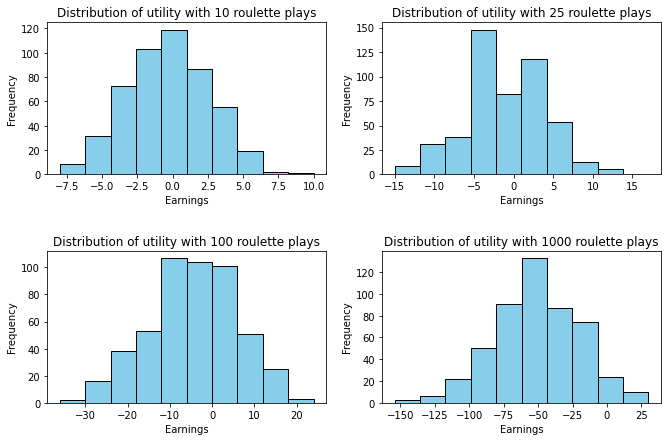

In [ ]:
#Create a plot of the simulations
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4,figsize=(11, 7))

grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.5)

#Simulation of 10 plays
ax1 = plt.subplot(grid[0, 0])
plt.hist(roulette_sim_array[0],ec='black', color='skyblue')
plt.xlabel("Earnings")
plt.ylabel("Frequency")

#Simulation of 25 plays
ax2 = plt.subplot(grid[0, 1:])
plt.hist(roulette_sim_array[1],ec='black', color='skyblue')
plt.xlabel("Earnings")
plt.ylabel("Frequency")

#Simulation of 100 plays
ax3 = plt.subplot(grid[1, :1])
plt.hist(roulette_sim_array[2],ec='black', color='skyblue')
plt.xlabel("Earnings")
plt.ylabel("Frequency")

#Simulation of 1000 plays
ax4 = plt.subplot(grid[1, 1:])
plt.hist(roulette_sim_array[3],ec='black', color='skyblue')
plt.xlabel("Earnings")
plt.ylabel("Frequency")

#Add atitle to each plot
ax1.title.set_text("Distribution of utility with 10 roulette plays")
ax2.title.set_text("Distribution of utility with 25 roulette plays")
ax3.title.set_text("Distribution of utility with 100 roulette plays")
ax4.title.set_text("Distribution of utility with 1000 roulette plays")

plt.show()

##### Grading Feedback Cell

Your explanation here:<br>  What I can see from the previous plots is the peak of the distribution is drifting towards larger negative numbers as the number of spins increase. This suggests that the person who is playing will increase their loses as they continue playing

##### Grading Feedback Cell

# Question 3 (10 pts)
Using the central limit theorem, create a pandas dataframe named roulette_df containing the sampling distribution of the means from the sample data in the numpy array above.  The pandas dataframe shall have 4 columns labeled with the simulation names. Using data in the roulette_df, plot histograms for each of the sampling distributions - you should have 4 histograms in total.<br>  

The following question is based on the theory of central limit theorem sampling.  Assuming you don't know the underlying distribution of the population from which the samples were drawn, some of the histograms are gauranteed to be Gaussian in shape, some are not gauranteed, and some are in a transition region. For each of the 4 simulations, describe if you think the shape is gauranteed to be gaussian, not gauranteed to be Gaussian, or in a transition area between a gaurantee and no gaurantee.

In [ ]:
#Generate the arrays of means
mean_dist10=roulette_sim_array[0]/10
mean_dist25=roulette_sim_array[1]/25
mean_dist100=roulette_sim_array[2]/100
mean_dist1000=roulette_sim_array[3]/1000
#Adding the arrays to a dataframe
roulette_df = pd.DataFrame(list(zip(mean_dist10,mean_dist25,mean_dist100,mean_dist1000)),
               columns =['mean_dist10', 'mean_dist25','mean_dist100','mean_dist1000'])

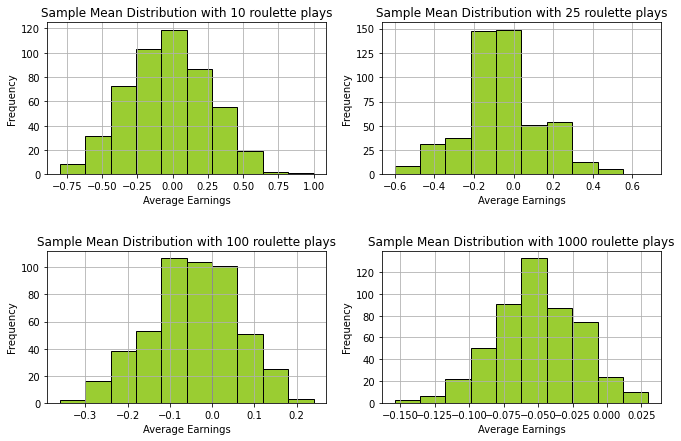

In [ ]:
#Creating plots of the sample mean distributions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4,figsize=(11, 7))

grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.5)

#Distribution of 10 plays
ax1 = plt.subplot(grid[0, 0])
roulette_df.iloc[:,0].hist(ec='black', color='yellowgreen')
plt.xlabel("Average Earnings")
plt.ylabel("Frequency")

#Distribution of 25 plays
ax2 = plt.subplot(grid[0, 1:])
roulette_df.iloc[:,1].hist(ec='black', color='yellowgreen')
plt.xlabel("Average Earnings")
plt.ylabel("Frequency")

#Distribution of 100 plays
ax3 = plt.subplot(grid[1, :1])
roulette_df.iloc[:,2].hist(ec='black', color='yellowgreen')
plt.xlabel("Average Earnings")
plt.ylabel("Frequency")

#Distribution of 1000 plays
ax4 = plt.subplot(grid[1, 1:])
roulette_df.iloc[:,3].hist(ec='black', color='yellowgreen')
plt.xlabel("Average Earnings")
plt.ylabel("Frequency")

#Adding a title to each plot
ax1.title.set_text("Sample Mean Distribution with 10 roulette plays")
ax2.title.set_text("Sample Mean Distribution with 25 roulette plays")
ax3.title.set_text("Sample Mean Distribution with 100 roulette plays")
ax4.title.set_text("Sample Mean Distribution with 1000 roulette plays")


plt.show()

In [ ]:
# Grading cell - do not modify
display(roulette_df.head())

,mean_dist10,mean_dist25,mean_dist100,mean_dist1000
0,0.0,-0.04,0.08,-0.016
1,-0.4,0.20,0.00,-0.058
2,-0.2,0.12,0.02,-0.018
3,-0.2,0.04,0.12,-0.056
4,-0.4,-0.12,-0.08,-0.058


##### Grading Feedback Cell

Your explanation here:<br> All the previous plots show a sample mean distribution that is pretty similar to a normal distribution. Also, the peaks are around -0.05, which is the expected value or earnings. The Large Numbers law supports this finding.

According to the rule that we saw in class, we should have samples of 30 observations at least to guarantee the distribution is normal. In the previous plots, I would say the 10 plays plot is not guaranteed to be normal, the 25 plays plot is in transition, 100 and 1000 are Gaussian. 

##### Grading Feedback Cell

- Nice plots and explanation!

# Question 4 (20 pts)
Create a new monte carlo simulation that calculates the probability that the casino loses money based on the number of times that a player plays roulette.  Create a function p_casino_loss that takes as an argument the number of times that the player plays roulette (n_plays), and returns the probability that the casino loses money.  Your code should simulate spinning the roulette wheel.  Run the n_plays simulation a fixed large number of times (100 works) and return the average probability result.  Using data collected from p_casino_loss, produce a line plot that shows the probability that the casino loses money vs. the number of games played for number of games between 25 and 1000.  Describe what the results of the simulation show.

In [ ]:
# your code here
#Create a function to know the probability of the casino losing
def p_casino_loss(n_plays):
  """The following function calculates the probability that the casino loses money"""
  simulation=[]
  prob=0
  for i in range(100):
    #simulate the number of games
    simulation += [get_outcome(n_plays)]

  #Average probability of the losing games
  prob = np.sum(np.array(simulation)>0)/100
  #return the average probability
  return prob

In [ ]:
#Create the values for the plot
simulations=[]
for i in range(25,1001):
  simulations += [p_casino_loss(i)]

simulations=np.array(simulations)

Text(0, 0.5, 'Probability of casino losing')

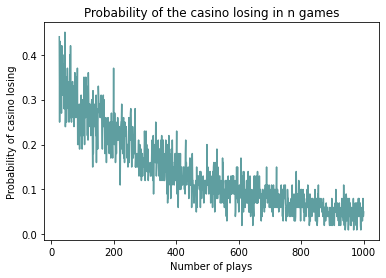

In [ ]:
#Create the plot for te probability of the casino losing
plt.plot(range(25,1001),simulations, color='cadetblue')
plt.title('Probability of the casino losing in n games')
plt.xlabel('Number of plays')
plt.ylabel('Probability of casino losing')

Your explanation here:<br> The results show that if a player keeps playing, the probability of the casino losing decreases. In other words, the player loses more money in the long run

##### Grading Feedback Cell

# Question 5 (10 pts)
Compute the following matrix dot product manually by creating 2 dimensinal nympy arrays for each matrix, computing the matrix multiply using python for loops, and loading a new 2 dimensional numpy array with the answer.  Print the resulting numpy array.

$$
\quad
\begin{bmatrix} 
3 & 7 \\
6 & 9 \\
4 & 2 \\
\end{bmatrix}
\quad
*
\quad
\begin{bmatrix} 
2 & 5 & 7\\
2 & 5 & 1
\end{bmatrix}
\quad
$$

In [ ]:
# your code here
#Create the matrices 
matrix1=np.array([[3,7],[6,9],[4,2]])
matrix2=np.array([[2,5,7],[2,5,1]])
multip=[]
for i in range(len(matrix1)):
  element=[]
  #filling the matrix entrances
  for j in range(len(matrix2[0])):
    product=0
    #multiply elements and sum
    for k in range(len(matrix1[i])):
      product+=matrix1[i][k]*matrix2[k][j]
    element.append(product)
  multip.append(element)

#showing the final result
np.array(multip)



array([[20, 50, 28],
       [30, 75, 51],
       [12, 30, 30]])

##### Grading Feedback Cell

# Question 6 (10 pts)
Read each of the 4 assignment csv files into pandas dataframes named population_df, morttality_df, life_exp_df, and fertility_df.  Rename the column with the country names as "Country" in each of the dataframes.  Hint - the bash datafiles data_file_array at the start of the assignment has the file names you need to load.  Another thing you can do is click the colab file icon to the left to view the file names stored on the local colab instance.

In [ ]:
# your code here
#Import the CSV file
population_df=pd.read_csv("indicator_gapminder_population.csv")
#Renaming the column
population_df.rename(columns={"Total population":"Country"}, inplace=True)

#Import the CSV file
morttality_df=pd.read_csv("indicator_gapminder_under5mortality.csv")
#Renaming the column
morttality_df.rename(columns={"Under five mortality":"Country"}, inplace=True)

#Import the CSV file
life_exp_df=pd.read_csv("indicator_life_expectancy_at_birth.csv")
#Renaming the column
life_exp_df.rename(columns={"Life expectancy with projections. Yellow is IHME":"Country"}, inplace=True)

#Import the CSV file
fertility_df=pd.read_csv("indicator_undata_total_fertility.csv")
#Renaming the column
fertility_df.rename(columns={"Total fertility rate":"Country"}, inplace=True)



In [ ]:
# grading cell - do not modify
display(population_df.head())
display(morttality_df.head())
display(life_exp_df.head())
display(fertility_df.head())

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700,15700,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,...,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2,56.91,57.63
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,...,74.5,74.7,74.9,75.0,75.2,75.5,75.7,75.8,75.90,76.00
4,Algeria,28.8224,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,28.822400,28.822400,...,74.8,75.0,75.3,75.6,75.9,76.1,76.2,76.3,76.40,76.50


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


##### Grading Feedback Cell

# Question 7 (10 pts)
The data frames from the question above are organized such that rows are countries and columns are years.  Reorganize each data frame such that each row contains 3 columns: country, year, and a data value.  This is known as the long or tidy format.  For example, the population data frame columns start out as country, year, year, year, ..., year.  After reorganizing, the population data frame columns will contain only 3 columns: country, year, and population.  Save the reorganized data into new data frames named tidy_population_df, tidy_morttality_df, tidy_life_exp_df, and tidy_fertility_df.  You are free to use any means necessary to perform this task but the pandas melt function may be useful.

In [ ]:
# your code here
#Getting the column names of years
names=population_df.columns[1:]
#Unpivoting the table
tidy_population_df = population_df.melt(id_vars=['Country'], value_vars=names,var_name='year')

#Getting the column names of years
names=morttality_df.columns[1:]
#Unpivoting the table
tidy_morttality_df = morttality_df.melt(id_vars=['Country'], value_vars=names,var_name='year')

#Getting the column names of years
names=life_exp_df.columns[1:]
#Unpivoting the table
tidy_life_exp_df = life_exp_df.melt(id_vars=['Country'], value_vars=names,var_name='year')

#Getting the column names of years
names=fertility_df.columns[1:]
#Unpivoting the table
tidy_fertility_df = fertility_df.melt(id_vars=['Country'], value_vars=names,var_name='year')

In [ ]:
# grading cell - do not modify
display(tidy_population_df.head())
print(tidy_population_df.shape)
display(tidy_morttality_df.head())
print(tidy_morttality_df.shape)
display(tidy_life_exp_df.head())
print(tidy_life_exp_df.shape)
display(tidy_fertility_df.head())
print(tidy_fertility_df.shape)

,Country,year,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,"410,445"
4,Algeria,1800,"2,503,218"


(22275, 3)


,Country,year,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,468.58
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,375.20
4,Algeria,1800,460.21


(59400, 3)


,Country,year,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.2110
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.4000
4,Algeria,1800,28.8224


(56160, 3)


,Country,year,value
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


(56160, 3)


##### Grading Feedback Cell

# Question 8 (10 pts)
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe.  The join operation should not throw away any data.  Name the new dataframe concat_df.  Next, delete all rows where life expectancy and fertility are NAN.

In [ ]:
# your code here
#Rename the value variable for each table to differenciate between data
col_names=['population', 'mortality', 'life_expectancy', 'fertility']
i=0
for file in [tidy_population_df,tidy_morttality_df,tidy_life_exp_df,tidy_fertility_df]:
  file.rename(columns={'value':col_names[i]}, inplace=True)
  file.set_index(['Country','year'], inplace=True)
  i+=1

#Merge the dataframes
concat_df=tidy_population_df.join([tidy_morttality_df,tidy_life_exp_df,tidy_fertility_df],how='outer')
concat_df.reset_index(inplace=True)

#Drop all the row that have a null value in one or both of 'life_expectancy' and 'fertility' 
concat_df.dropna(how='all',subset=['life_expectancy', 'fertility'], inplace=True)

In [ ]:
# grading cell - do not modify
display(concat_df.head())
print(concat_df.shape)

,Country,year,population,mortality,life_expectancy,fertility
216,Afghanistan,1800,3280000,468.58,28.211000,7.0
217,Afghanistan,1801,NaN,468.58,28.200753,7.0
218,Afghanistan,1802,NaN,468.58,28.190507,7.0
219,Afghanistan,1803,NaN,468.58,28.180260,7.0
220,Afghanistan,1804,NaN,468.58,28.170013,7.0


(43789, 6)


##### Grading Feedback Cell

# Question 9 (10 pts)
Using concat_df, report the child mortality rate and life expectancy in 2015 for these 5 countries:
1. Sri Lanka
2. Poland
3. Malaysia
4. Pakistan
5. Thailand

In [ ]:
# Your code here
#Filter the data to keep those countries, the year and columns desired 
concat_df.loc[(concat_df['Country'].isin(['Sri Lanka','Poland','Malaysia','Pakistan','Thailand'])) & 
              (concat_df['year']=='2015'),
              ['Country','year','mortality','life_expectancy']]

,Country,year,mortality,life_expectancy
30455,Malaysia,2015,8.2,75.1
38879,Pakistan,2015,81.1,66.5
40607,Poland,2015,5.2,77.3
47519,Sri Lanka,2015,8.7,76.5
51623,Thailand,2015,12.3,75.1


##### Grading Feedback Cell